In [1]:
import os
os.chdir('C:\\Users\\telug\\OneDrive\\Desktop\\WD_python')
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df=pd.read_csv('adult_income.csv')

In [3]:
df


,Unnamed: 0,Age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   Age             32561 non-null  int64 
 2   Workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education-num   32561 non-null  int64 
 6   marital-status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital-gain    32561 non-null  int64 
 12  capital-loss    32561 non-null  int64 
 13  hours-per-week  32561 non-null  int64 
 14  native-country  32561 non-null  object
 15  income          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
#income(Target variable)

In [9]:
df.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [10]:
#income is in words(need to label it as 0 and 1)
df['income']=df.get('income').replace(' <=50K',0)
df['income']=df.get('income').replace(' >50K',1)

In [11]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of income')

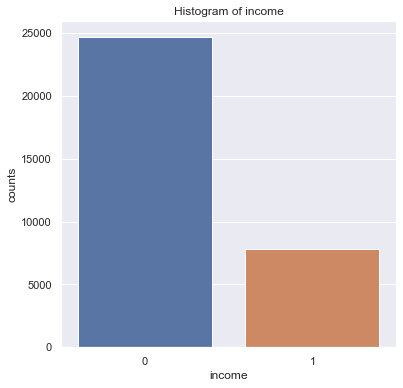

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['income'])
plt.show
plt.xlabel('income')
plt.ylabel('counts')
plt.title('Histogram of income') 

In [13]:
#Age

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Age')

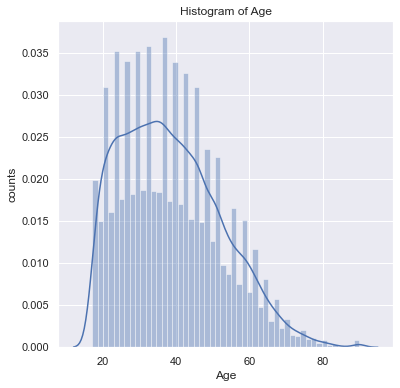

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Age'])
plt.show
plt.xlabel('Age')
plt.ylabel('counts')
plt.title('Histogram of Age') 

<AxesSubplot:>

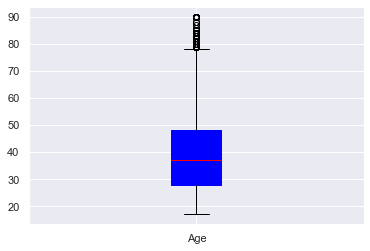

In [15]:
Age=df['Age']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Age.plot.box(color=props2,patch_artist=True,vert=True)

In [16]:
#Workclass(categorical(nominal))

In [17]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [18]:
df.drop(df.loc[df['Workclass']==' ?'].index, inplace=True)

In [19]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of Workclass')

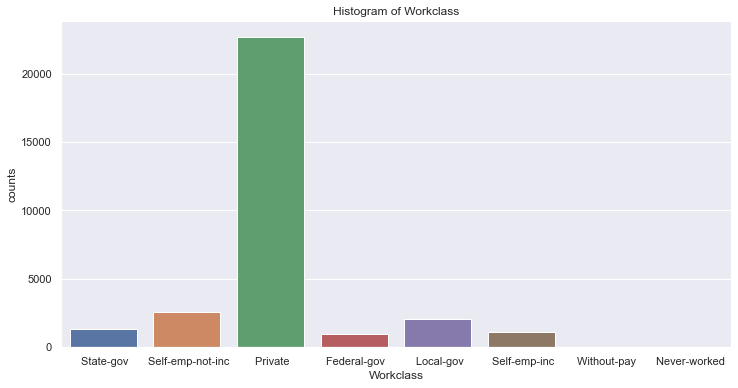

In [20]:
sns.set()
plt.figure(figsize=(12,6))
sns.countplot(df['Workclass'])
plt.show
plt.xlabel('Workclass')
plt.ylabel('counts')
plt.title('Histogram of Workclass') 

In [21]:
#fnlwgt(conti.)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of fnlwgt')

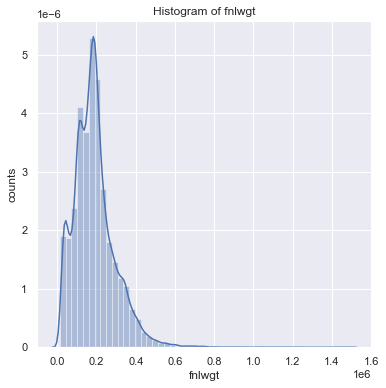

In [22]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['fnlwgt'])
plt.show
plt.xlabel('fnlwgt')
plt.ylabel('counts')
plt.title('Histogram of fnlwgt') 

<AxesSubplot:>

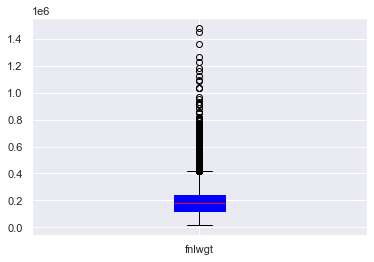

In [23]:
fnlwgt=df['fnlwgt']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
fnlwgt.plot.box(color=props2,patch_artist=True,vert=True)

In [24]:
#education

In [25]:
df.education.value_counts()

 HS-grad         9969
 Some-college    6777
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1057
 Assoc-acdm      1020
 10th             833
 7th-8th          574
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: education, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of education')

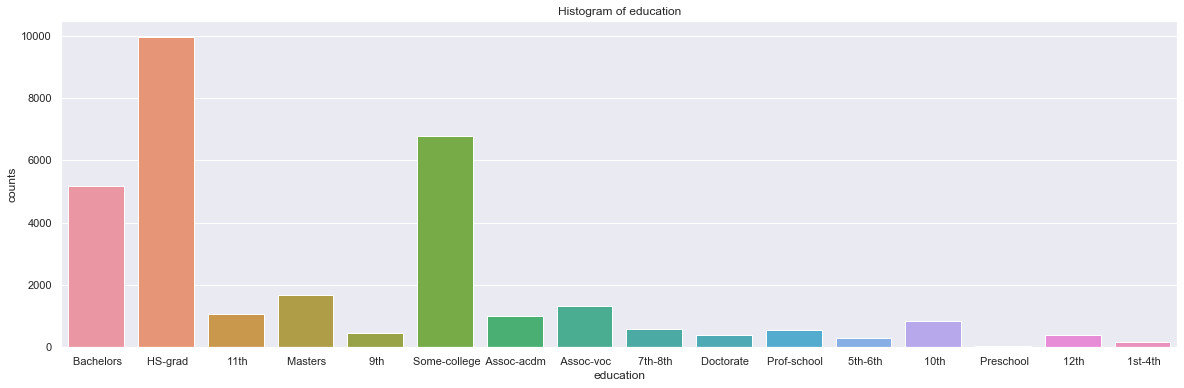

In [26]:
sns.set()
plt.figure(figsize=(20,6))
sns.countplot(df['education'])
plt.show
plt.xlabel('education')
plt.ylabel('counts')
plt.title('Histogram of education') 

In [27]:
#education-num

In [28]:
df = df.rename({'education-num':'education_num'}, axis=1)

In [29]:
df.education_num.value_counts()

9     9969
10    6777
13    5182
14    1675
11    1321
7     1057
12    1020
6      833
4      574
15     558
5      463
16     398
8      393
3      303
2      156
1       46
Name: education_num, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of education_num')

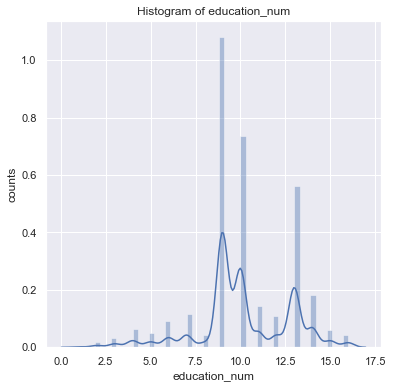

In [30]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['education_num'])
plt.show
plt.xlabel('education_num')
plt.ylabel('counts')
plt.title('Histogram of education_num') 

<AxesSubplot:>

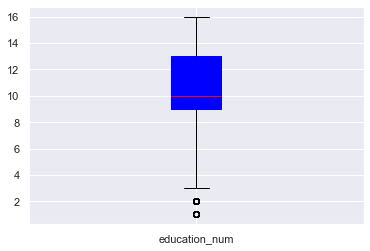

In [31]:
education_num=df['education_num']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
education_num.plot.box(color=props2,patch_artist=True,vert=True)

In [32]:
#marital-status

In [33]:
df = df.rename({'marital-status':'marital_status'}, axis=1)

In [34]:
df.marital_status.value_counts()

 Married-civ-spouse       14340
 Never-married             9917
 Divorced                  4259
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: marital_status, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of marital_status')

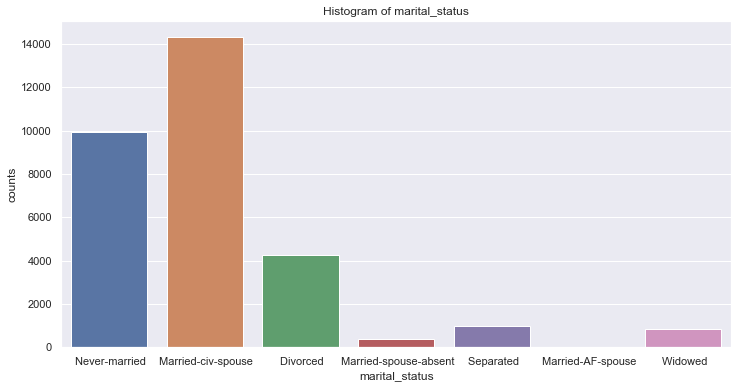

In [35]:
sns.set()
plt.figure(figsize=(12,6))
sns.countplot(df['marital_status'])
plt.show
plt.xlabel('marital_status')
plt.ylabel('counts')
plt.title('Histogram of marital_status') 

In [36]:
#occupation

In [37]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
 ?                       7
Name: occupation, dtype: int64

In [38]:
df.drop(df.loc[df['occupation']==' ?'].index, inplace=True)

In [39]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of occupation')

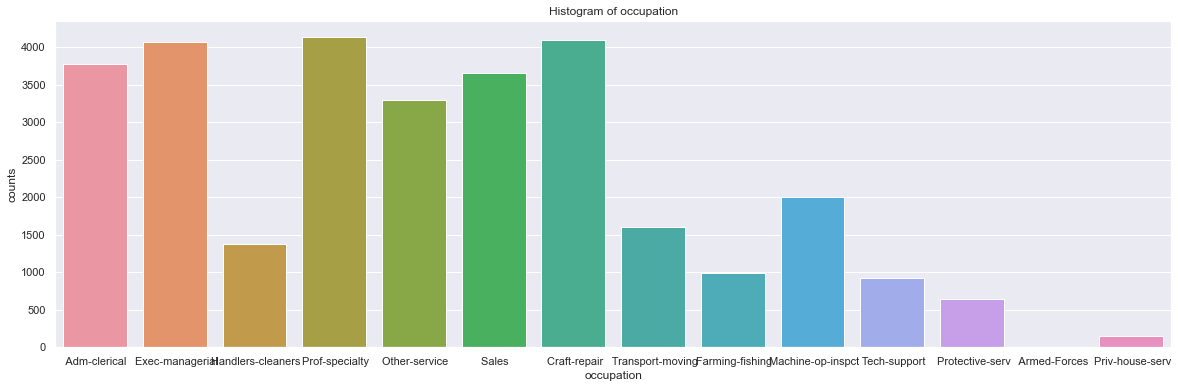

In [40]:
sns.set()
plt.figure(figsize=(20,6))
sns.countplot(df['occupation'])
plt.show
plt.xlabel('occupation')
plt.ylabel('counts')
plt.title('Histogram of occupation') 

In [41]:
#relationship

In [42]:
df.relationship.value_counts()

 Husband           12704
 Not-in-family      7865
 Own-child          4525
 Unmarried          3271
 Wife               1435
 Other-relative      918
Name: relationship, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of relationship')

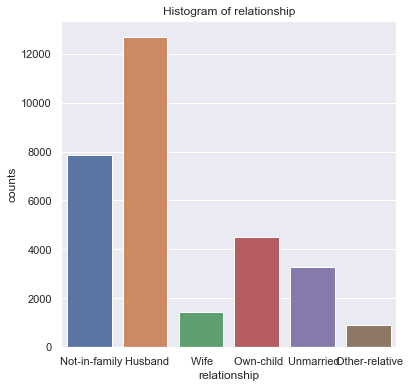

In [43]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['relationship'])
plt.show
plt.xlabel('relationship')
plt.ylabel('counts')
plt.title('Histogram of relationship') 

In [44]:
#race

In [45]:
df.race.value_counts()

 White                 26301
 Black                  2909
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: race, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of race')

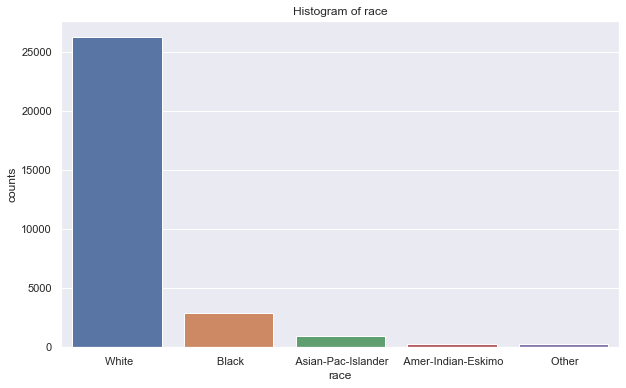

In [46]:
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(df['race'])
plt.show
plt.xlabel('race')
plt.ylabel('counts')
plt.title('Histogram of race') 

In [47]:
#sex

In [48]:
df.sex.value_counts()

 Male      20788
 Female     9930
Name: sex, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of sex')

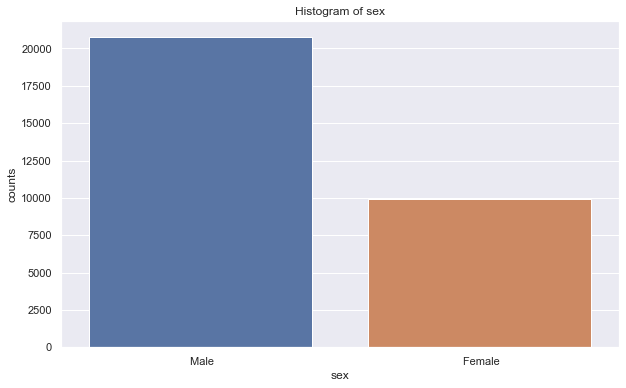

In [49]:
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(df['sex'])
plt.show
plt.xlabel('sex')
plt.ylabel('counts')
plt.title('Histogram of sex') 

In [50]:
#capital-gain

In [51]:
df = df.rename({'capital-gain':'capital_gain'}, axis=1)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of capital_gain')

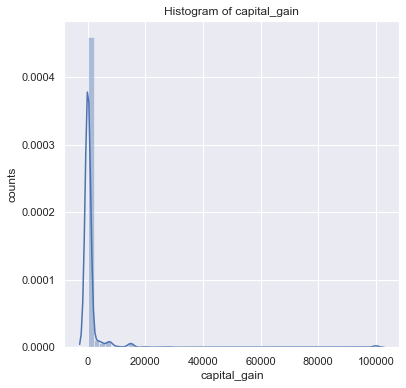

In [52]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['capital_gain'])
plt.show
plt.xlabel('capital_gain')
plt.ylabel('counts')
plt.title('Histogram of capital_gain') 

<AxesSubplot:>

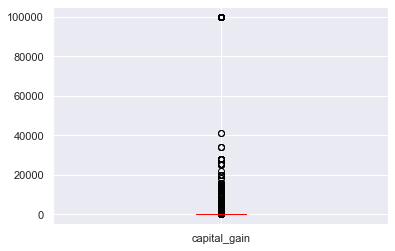

In [53]:
capital_gain=df['capital_gain']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
capital_gain.plot.box(color=props2,patch_artist=True,vert=True)

In [54]:
#capital-loss

In [55]:
df = df.rename({'capital-loss':'capital_loss'}, axis=1)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of capital_loss')

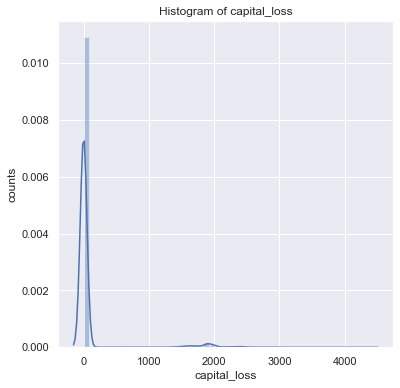

In [56]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['capital_loss'])
plt.show
plt.xlabel('capital_loss')
plt.ylabel('counts')
plt.title('Histogram of capital_loss') 

<AxesSubplot:>

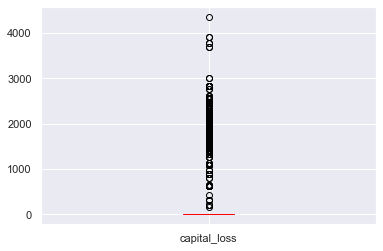

In [57]:
capital_loss=df['capital_loss']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
capital_loss.plot.box(color=props2,patch_artist=True,vert=True)

In [58]:
#hours-per-week

In [59]:
df = df.rename({'hours-per-week':'hours_per_weeks'}, axis=1)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of hours_per_weeks')

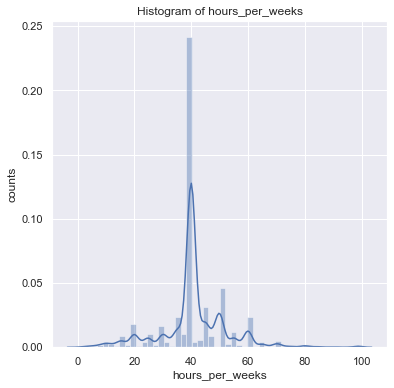

In [60]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['hours_per_weeks'])
plt.show
plt.xlabel('hours_per_weeks')
plt.ylabel('counts')
plt.title('Histogram of hours_per_weeks') 

<AxesSubplot:>

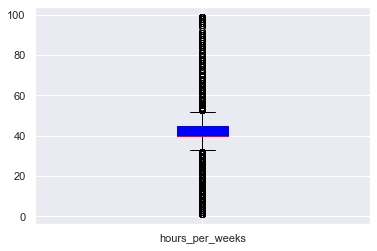

In [61]:
hours_per_weeks=df['hours_per_weeks']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
hours_per_weeks.plot.box(color=props2,patch_artist=True,vert=True)

In [62]:
#native-country

In [63]:
df = df.rename({'native-country':'native_country'}, axis=1)

In [64]:
df.native_country.value_counts()

 United-States                 27504
 Mexico                          610
 ?                               556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

In [65]:
df.drop(df.loc[df['native_country']==' ?'].index, inplace=True)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of native_country')

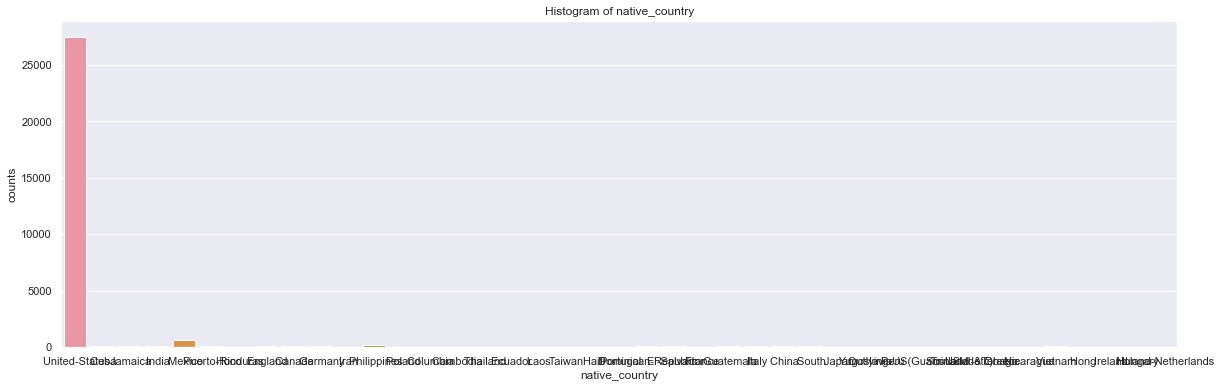

In [66]:
sns.set()
plt.figure(figsize=(20,6))
sns.countplot(df['native_country'])
plt.show
plt.xlabel('native_country')
plt.ylabel('counts')
plt.title('Histogram of native_country')

In [67]:
#covert to csv
df.to_csv('adult_income1.csv')

In [68]:
df1=pd.read_csv('adult_income1.csv')
            

In [69]:
df1

,Age,Workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_weeks,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              30162 non-null  int64 
 1   Workclass        30162 non-null  object
 2   fnlwgt           30162 non-null  int64 
 3   education        30162 non-null  object
 4   education_num    30162 non-null  int64 
 5   marital_status   30162 non-null  object
 6   occupation       30162 non-null  object
 7   relationship     30162 non-null  object
 8   race             30162 non-null  object
 9   sex              30162 non-null  object
 10  capital_gain     30162 non-null  int64 
 11  capital_loss     30162 non-null  int64 
 12  hours_per_weeks  30162 non-null  int64 
 13  native_country   30162 non-null  object
 14  income           30162 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.5+ MB


In [71]:
#label encoding 'Workclass'
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Workclass']= label_encoder.fit_transform(df1['Workclass'])

In [72]:
df1.Workclass.value_counts()

2    22286
4     2499
1     2067
5     1279
3     1074
0      943
6       14
Name: Workclass, dtype: int64

In [73]:
df1.education.value_counts()

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [74]:
#encoding 'education' as it is ordinal
df1['education']=df1.get('education').replace(' Preschool',0)
df1['education']=df1.get('education').replace(' 1st-4th',1)
df1['education']=df1.get('education').replace(' 5th-6th',2)
df1['education']=df1.get('education').replace(' 7th-8th',3)
df1['education']=df1.get('education').replace(' 9th',4)
df1['education']=df1.get('education').replace(' 10th',5)
df1['education']=df1.get('education').replace(' 11th',6)
df1['education']=df1.get('education').replace(' 12th',7)
df1['education']=df1.get('education').replace(' Prof-school',8)
df1['education']=df1.get('education').replace(' Some-college',9)
df1['education']=df1.get('education').replace(' HS-grad',10)
df1['education']=df1.get('education').replace(' Bachelors',11)
df1['education']=df1.get('education').replace(' Assoc-voc',12)
df1['education']=df1.get('education').replace(' Assoc-acdm',13)
df1['education']=df1.get('education').replace(' Masters',14)
df1['education']=df1.get('education').replace(' Doctorate',15)

In [75]:
df1.education.value_counts()

10    9840
9     6678
11    5044
14    1627
12    1307
6     1048
13    1008
5      820
3      557
8      542
4      455
7      377
15     375
2      288
1      151
0       45
Name: education, dtype: int64

In [76]:
df1.marital_status.value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital_status, dtype: int64

In [77]:
#label encoding 'marital_status'
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['marital_status']= label_encoder.fit_transform(df1['marital_status'])

In [78]:
df1.marital_status.value_counts()

2    14065
4     9726
0     4214
5      939
6      827
3      370
1       21
Name: marital_status, dtype: int64

In [79]:
df1.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [80]:
#label encoding 'occupation'
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['occupation']= label_encoder.fit_transform(df1['occupation'])

In [81]:
df1.occupation.value_counts()

9     4038
2     4030
3     3992
0     3721
11    3584
7     3212
6     1966
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: occupation, dtype: int64

In [82]:
df1.relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: relationship, dtype: int64

In [83]:
#label encoding 'relationship'
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['relationship']= label_encoder.fit_transform(df1['relationship'])

In [84]:
df1.relationship.value_counts()

0    12463
1     7726
3     4466
4     3212
5     1406
2      889
Name: relationship, dtype: int64

In [85]:
df1.race.value_counts()

 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [86]:
#label encoding 'race'
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['race']= label_encoder.fit_transform(df1['race'])

In [87]:
df1.race.value_counts()

4    25933
2     2817
1      895
0      286
3      231
Name: race, dtype: int64

In [88]:
df1.sex.value_counts()

 Male      20380
 Female     9782
Name: sex, dtype: int64

In [89]:
#label encoding 'race'
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['sex']= label_encoder.fit_transform(df1['sex'])

In [90]:
df1.sex.value_counts()

1    20380
0     9782
Name: sex, dtype: int64

In [91]:
#label encoding 'native_country'
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['native_country']= label_encoder.fit_transform(df1['native_country'])

In [92]:
df1.native_country.value_counts()

38    27504
25      610
29      188
10      128
32      109
1       107
18      100
7       100
4        92
8        86
22       80
34       71
2        68
21       68
5        67
39       64
12       63
23       59
30       56
3        56
19       42
35       42
13       42
31       34
26       33
28       30
11       29
9        27
6        27
20       24
16       19
0        18
37       18
36       17
24       17
40       16
27       14
17       13
15       12
33       11
14        1
Name: native_country, dtype: int64

In [94]:
df1.sex.value_counts()

1    20380
0     9782
Name: sex, dtype: int64

In [ ]:
#SMOTE

In [96]:
less_than_50 = df1[df1.income == 0]
more_than_50 = df1[df1.income == 1]

In [97]:
from sklearn.utils import resample
def_oversample = resample(more_than_50, replace = True,n_samples=len(less_than_50),random_state=27)

In [98]:
BCsmote = pd.concat([less_than_50, def_oversample])

In [99]:
BCsmote.income.value_counts()

0    22654
1    22654
Name: income, dtype: int64

In [130]:
#covert to csv
BCsmote.to_csv('adult_income_smote.csv')

In [131]:
df2=pd.read_csv('adult_income_smote.csv')

In [132]:
df2

,Age,Workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_weeks,native_country,income
0,39,5,77516,11,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,11,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,6,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,11,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45303,47,3,192894,11,13,2,3,0,4,1,0,1902,45,38,1
45304,46,1,124071,14,14,0,3,4,4,0,0,0,65,38,1
45305,34,2,153614,10,9,2,11,0,4,1,0,0,45,38,1
45306,50,1,124963,10,9,2,2,0,4,1,0,1977,35,38,1


In [133]:
df2.income.value_counts()

0    22654
1    22654
Name: income, dtype: int64

# BUILDING MODEl

In [134]:
#X and y
X=df2.drop('income',axis=1)
y=df2['income']

In [135]:
#train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson

In [137]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [138]:
# model 
dt = tree.DecisionTreeClassifier()
dtmodel = dt.fit(X_train, y_train)

[Text(0.6705745133841801, 0.9878048780487805, 'X[7] <= 0.5\ngini = 0.5\nsamples = 36246\nvalue = [18128, 18118]'),
 Text(0.42895813361150453, 0.9634146341463414, 'X[4] <= 12.5\ngini = 0.405\nsamples = 19192\nvalue = [5420, 13772]'),
 Text(0.30237598850687436, 0.9390243902439024, 'X[10] <= 5095.5\ngini = 0.476\nsamples = 11857\nvalue = [4628, 7229]'),
 Text(0.10952735545573804, 0.9146341463414634, 'X[3] <= 6.5\ngini = 0.49\nsamples = 10778\nvalue = [4621, 6157]'),
 Text(0.0195548724808046, 0.8902439024390244, 'X[0] <= 37.5\ngini = 0.375\nsamples = 1202\nvalue = [902, 300]'),
 Text(0.004609468444947462, 0.8658536585365854, 'X[12] <= 44.0\ngini = 0.19\nsamples = 348\nvalue = [311, 37]'),
 Text(0.002469358095507569, 0.8414634146341463, 'X[6] <= 11.5\ngini = 0.116\nsamples = 259\nvalue = [243, 16]'),
 Text(0.0016462387303383791, 0.8170731707317073, 'X[6] <= 1.0\ngini = 0.068\nsamples = 227\nvalue = [219, 8]'),
 Text(0.0009877432382030275, 0.7926829268292683, 'X[4] <= 6.5\ngini = 0.5\nsample

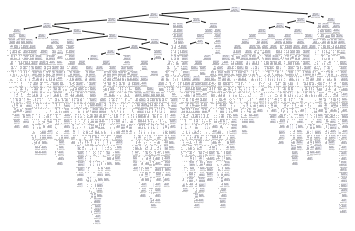

In [139]:
# tree plot
tree.plot_tree(dtmodel)

In [140]:
y_predict = dtmodel.predict(X_test)

In [141]:
# classification matrix
confusion_matrix(y_test, y_predict)

array([[3907,  619],
       [ 171, 4365]], dtype=int64)

In [142]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      4526
           1       0.88      0.96      0.92      4536

    accuracy                           0.91      9062
   macro avg       0.92      0.91      0.91      9062
weighted avg       0.92      0.91      0.91      9062



In [143]:
y_pred_prob = dtmodel.predict_proba(X_test)
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) 
print(roc_auc) 

0.9127681157895475


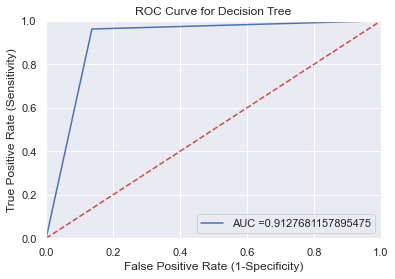

In [144]:
#ROC Curve
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

In [145]:
#oaa
from sklearn.metrics import accuracy_score

In [146]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [147]:
print(round(accuracy_score(y_train,y_train_pred),2))
print(round(accuracy_score(y_test,y_test_pred),2))

1.0
0.91


In [148]:
#find optinum no of depth
depth=[1,2,3,4,5,6,7,8,9]
accuracy_train,accuracy_test=[],[]
for i in depth:
        tree=DecisionTreeClassifier(max_depth=i)
        dt.fit(X_train,y_train)
        y_train_pred1=dt.predict(X_train)
        y_test_pred1=dt.predict(X_test)
        
        accuracy_train.append(accuracy_score(y_train,y_train_pred1))
        accuracy_test.append(accuracy_score(y_test,y_test_pred1))

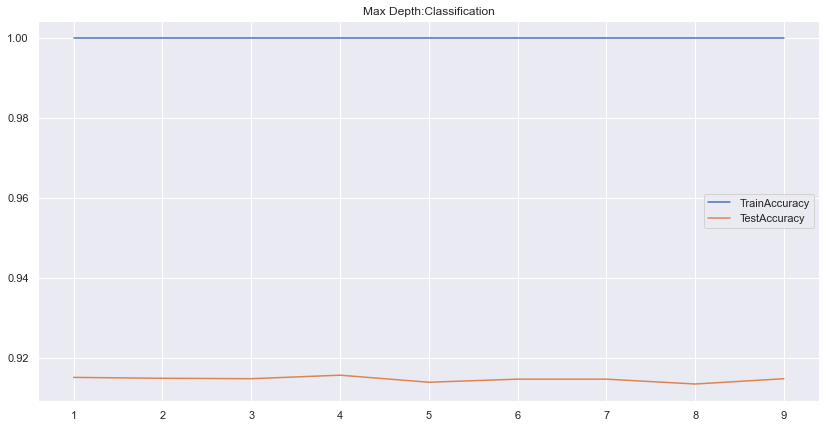

In [149]:
#plot
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=depth,label='TrainAccuracy')
sns.lineplot(y=accuracy_test,x=depth,label='TestAccuracy')
plt.title('Max Depth:Classification')
plt.show()

In [150]:
#Building a tree with depth 4
tree2=DecisionTreeClassifier(random_state=40,max_depth=4)
tree2.fit(X_train,y_train)
y_train_pred2=tree2.predict(X_train)
y_test_pred2=tree2.predict(X_test)


In [151]:
print(round(accuracy_score(y_train,y_train_pred2),2))
print(round(accuracy_score(y_test,y_test_pred2),2))

0.8
0.8
